In [34]:
!pip install tensorflow-gpu==2.9.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
import tensorflow as tf
print(tf.__version__)

2.9.1


In [36]:
#The TensorFlow Model Garden Repo
!git clone https://github.com/tensorflow/models.git 

fatal: destination path 'models' already exists and is not an empty directory.


In [37]:
pwd

'/content/training_demo'

**Download, install and compile Protobuf**
Make sure that in your Terminal window, you’re located in the Tensorflow directory. To compile proto files,


1.   **Protocol buffers, or Protobuf, is a binary format created by Google to serialize data between different services**
2. ** i am using this because, data is transmitted as a binary in protobuf. This improves the speed of transmission more than the raw string because it takes less space and bandwidth. Since the data is compressed, the CPU usage will also be less**.

In [38]:
cd /content/models/research

/content/models/research


In [39]:
pwd

'/content/models/research'

In [40]:
!protoc object_detection/protos/*.proto --python_out=.

**Install COCO API**

In [41]:
!git clone https://github.com/cocodataset/cocoapi.git


fatal: destination path 'cocoapi' already exists and is not an empty directory.


In [42]:
cd cocoapi/PythonAPI

/content/models/research/cocoapi/PythonAPI


**Here I am compiling all the files which I have installed**

In [43]:
!make #compilation purose

python setup.py build_ext --inplace
running build_ext
skipping 'pycocotools/_mask.c' Cython extension (up-to-date)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/pycocotools
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.7/dist-packages/numpy/core/include -I../common -I/usr/include/python3.7m -c ../common/maskApi.c -o build/temp.linux-x86_64-3.7/../common/maskApi.o -Wno-cpp -Wno-unused-function -std=c99
../common/maskApi.c: In function ‘rleDecode’:
../common/maskApi.c:46:7: warning: this ‘for’ clause does not guard... [-Wmisleading-indentation]
       for( k=0; k<R[i].cnts[j]; k++ ) *(M++)=v; v=!v; }}
       ^~~
../common/maskApi.c:46:49: not

**This is the final step of our Installation and Setup block! We’re going to install the Object Detection API itself. You do this by installing the object_detection package. Here’s how:**


1.   Make sure that within your Terminal window you’re located in the Tensorflow directory.
2.   Run the following commands one by one in your Terminal window:



In [44]:
cp -r pycocotools /content/models/research

In [45]:
cd ..

/content/models/research/cocoapi


In [46]:
cd .. 

/content/models/research


In [49]:
pwd

'/content/models/research'

In [50]:
cp object_detection/packages/tf2/setup.py .

In [51]:
!python -m pip install .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1694955 sha256=d625c0b27c6c31462c6df30b1fd1d0d9e828963547cea291b2c4edd3aed4d747
  Stored in directory: /tmp/pip-ephem-wheel-cache-826x33c7/wheels/fa/a4/d2/e9a5057e414fd46c8e543d2706cd836d64e1fcd9eccceb2329
Successfully built object-detection
  Attempting uninstall: object-detection
    Found existing installation: object-detection 0.1
    Uninstalling object-detection-0.1:
   

**here i am testing my installation is successful or not by running this command from Tensorflow/models/research directory in your Terminal window:**

In [52]:
# From within TensorFlow/models/research/
!python object_detection/builders/model_builder_tf2_test.py

Running tests under Python 3.7.13: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2022-07-29 12:09:13.425167: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
W0729 12:09:13.891561 139923793528704 model_builder.py:1102] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 1.59s
I0729 12:09:14.150954 139923793528704 test_util.py:2459] time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 1.59s
[       OK ] ModelBuilderTF2Test.test_create_center_net_deepmac
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)): 0.5s
I0729 12:09:14.649379 139923793528704 test_ut

**Once tests are finished, you will see a message printed out in your Terminal window. If all 20 tests were run and the status for them is “OK” (some might be skipped, that’s perfectly fine), then you are all set with the installation!**

In [55]:
cd /content/training_demo/pre-trained-models 

/content/training_demo/pre-trained-models


**Model selection and configuration**
here i going to download pre-trained EfficientDet-d1 from tensorflow 2 model zoo repo

In [56]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d1_coco17_tpu-32.tar.gz

--2022-07-29 12:09:58--  http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d1_coco17_tpu-32.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.251.12.128, 2404:6800:4003:c00::80
Connecting to download.tensorflow.org (download.tensorflow.org)|142.251.12.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51839363 (49M) [application/x-tar]
Saving to: ‘efficientdet_d1_coco17_tpu-32.tar.gz.2’

efficientdet_d1_coc 100%[===================>]  49.44M   250MB/s    in 0.2s    

2022-07-29 12:09:59 (250 MB/s) - ‘efficientdet_d1_coco17_tpu-32.tar.gz.2’ saved [51839363/51839363]



In [57]:
!tar -xvf efficientdet_d1_coco17_tpu-32.tar.gz

efficientdet_d1_coco17_tpu-32/
efficientdet_d1_coco17_tpu-32/checkpoint/
efficientdet_d1_coco17_tpu-32/checkpoint/ckpt-0.data-00000-of-00001
efficientdet_d1_coco17_tpu-32/checkpoint/checkpoint
efficientdet_d1_coco17_tpu-32/checkpoint/ckpt-0.index
efficientdet_d1_coco17_tpu-32/pipeline.config
efficientdet_d1_coco17_tpu-32/saved_model/
efficientdet_d1_coco17_tpu-32/saved_model/saved_model.pb
efficientdet_d1_coco17_tpu-32/saved_model/assets/
efficientdet_d1_coco17_tpu-32/saved_model/variables/
efficientdet_d1_coco17_tpu-32/saved_model/variables/variables.data-00000-of-00001
efficientdet_d1_coco17_tpu-32/saved_model/variables/variables.index


In [58]:
pwd

'/content/training_demo/pre-trained-models'

In [59]:
cd /content/training_demo

/content/training_demo


In [60]:
CUDA_VISIBLE_DEVICES=0

**Data preparation**

1. here i have alreay prepared annotated images by using **labelimg**
2.  then i am transforming each of my datasets (training, validation and testing) into the TFRecord format using this generate_tfrecord.py file. 
3.   theny i created Label Map and stored it in annotations folder








In [61]:
# Create train data:
!python generate_tfrecord.py -x /content/training_demo/images/train -l /content/training_demo/annotations/label_map.pbtxt -o /content/training_demo/annotations/train.record

# Create test data:
!python generate_tfrecord.py -x /content/training_demo/images/test -l /content/training_demo/annotations/label_map.pbtxt -o /content/training_demo/annotations/test.record

Successfully created the TFRecord file: /content/training_demo/annotations/train.record
Successfully created the TFRecord file: /content/training_demo/annotations/test.record


In [62]:
pwd

'/content/training_demo'

In [63]:
ls

annotations/         export_tflite_graph_tf2.py  model_main_tf2.py
exported-models/     generate_tfrecord.py        models/
exporter_main_v2.py  images/                     pre-trained-models/



**Model training**

In [64]:
!python model_main_tf2.py --model_dir=/content/training_demo/models/efficientdet_d1_coco17 --pipeline_config_path=/content/training_demo/models/efficientdet_d1_coco17/pipeline.config


2022-07-29 12:10:36.765173: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I0729 12:10:36.798611 139992455600000 mirrored_strategy.py:374] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: None
I0729 12:10:36.803792 139992455600000 config_util.py:552] Maybe overwriting train_steps: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0729 12:10:36.803962 139992455600000 config_util.py:552] Maybe overwriting use_bfloat16: False
I0729 12:10:36.821702 139992455600000 ssd_efficientnet_bifpn_feature_extractor.py:146] EfficientDet EfficientNet backbone version: efficientnet-b1
I0729 12:10:36.821836 139992455600000 ssd_efficientnet_bifpn_feature_extractor.py:147] Ef

In [30]:
pwd

'/content/training_demo'

In [31]:
   ! python exporter_main_v2.py --input_type image_tensor --pipeline_config_path /content/training_demo/models/efficientdet_d1_coco17/pipeline.config --trained_checkpoint_dir /content/training_demo/models/efficientdet_d1_coco17 --output_directory /content/training_demo/exported-models/my_model


2022-07-29 12:04:12.717981: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I0729 12:04:12.726775 139844493252480 ssd_efficientnet_bifpn_feature_extractor.py:146] EfficientDet EfficientNet backbone version: efficientnet-b1
I0729 12:04:12.726961 139844493252480 ssd_efficientnet_bifpn_feature_extractor.py:147] EfficientDet BiFPN num filters: 88
I0729 12:04:12.727039 139844493252480 ssd_efficientnet_bifpn_feature_extractor.py:149] EfficientDet BiFPN num iterations: 4
I0729 12:04:12.730332 139844493252480 efficientnet_model.py:143] round_filter input=32 output=32
I0729 12:04:12.753039 139844493252480 efficientnet_model.py:143] round_filter input=32 output=32
I0729 12:04:12.753145 139844493252480 efficientnet_model.py:143] round_filter input=16 output=16
I0729 12:04:12.873893 139844493252480 efficientnet_model.py:143] round_filter input=16 output=16
I07

Loading model...Done! Took 49.56978416442871 seconds
Running inference for /content/training_demo/images/test/image25.jpg... Done


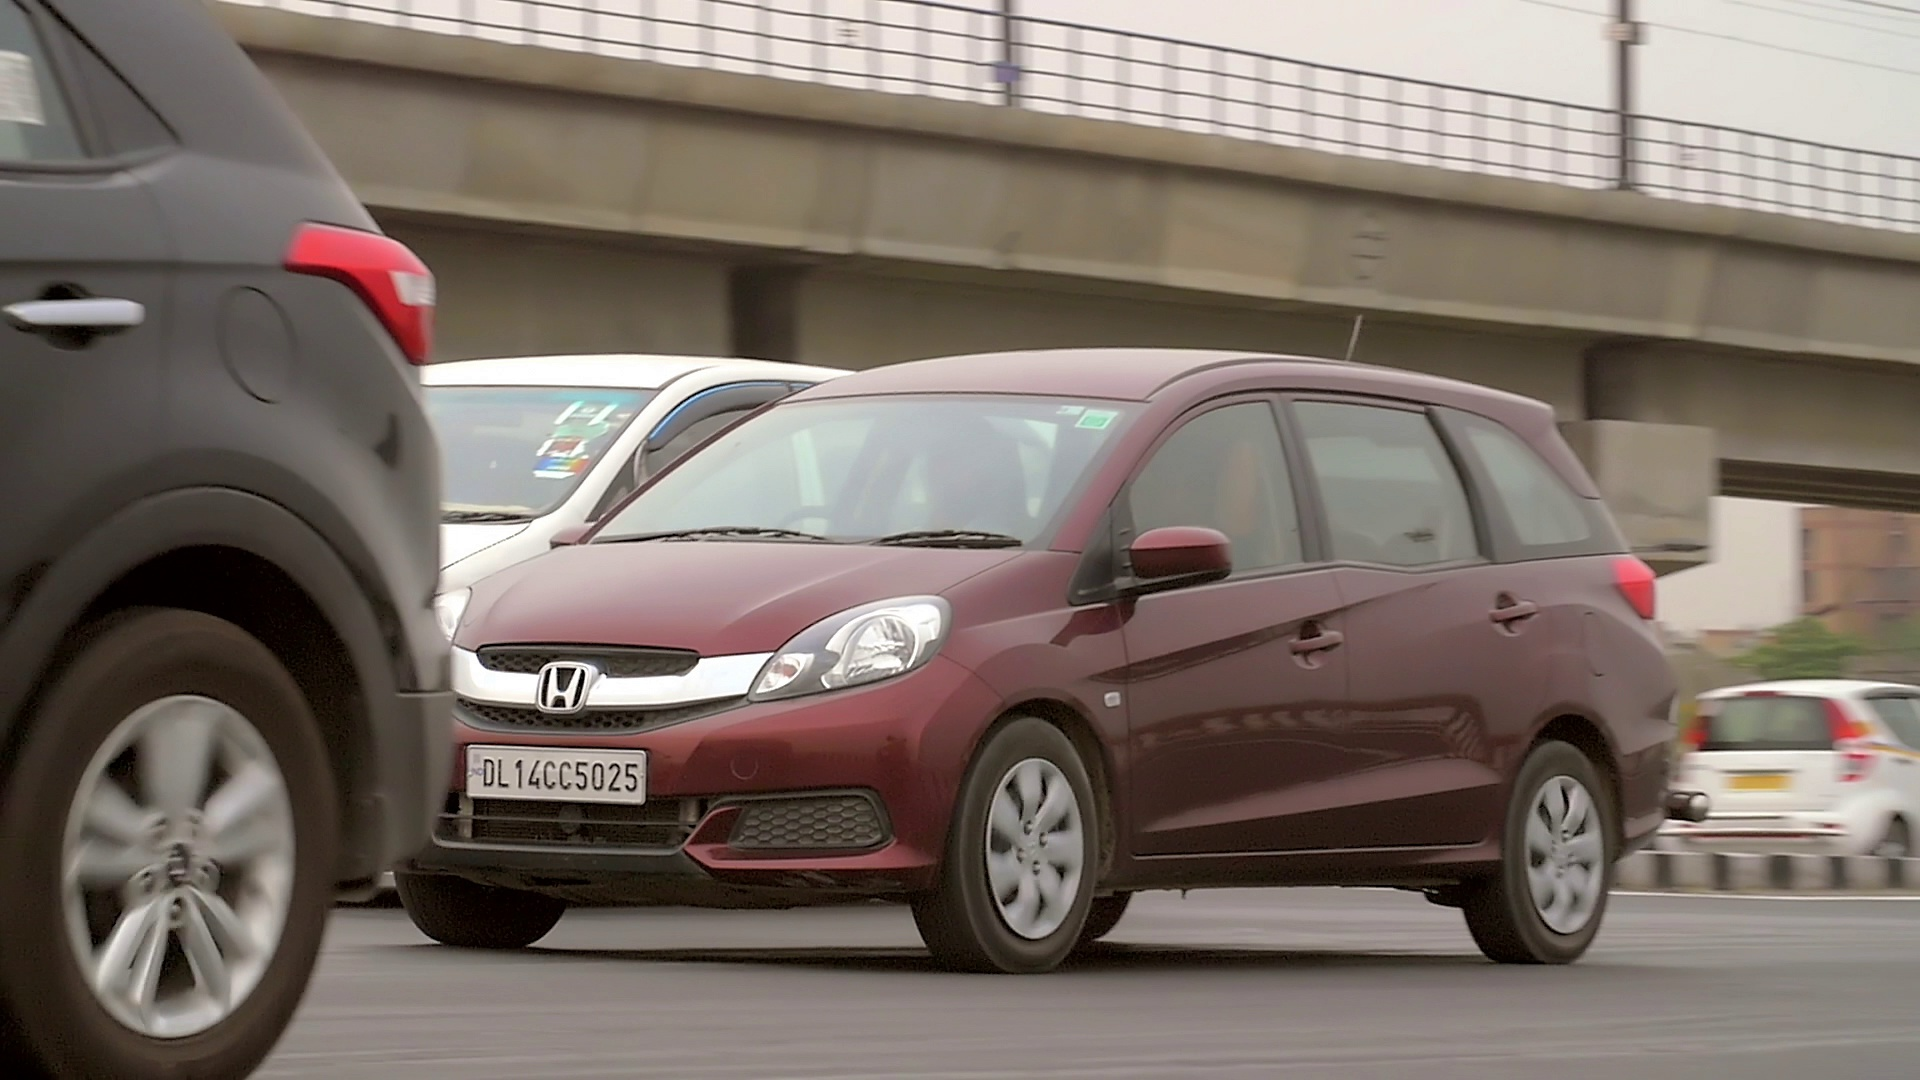

In [ ]:
"""
Object Detection (On Image) From TF2 Saved Model
=====================================
"""

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
import pathlib
import tensorflow as tf
import cv2
import argparse
from google.colab.patches import cv2_imshow

# Enable GPU dynamic memory allocation
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# PROVIDE PATH TO IMAGE DIRECTORY
IMAGE_PATHS = '/content/training_demo/images/test/image25.jpg'


# PROVIDE PATH TO MODEL DIRECTORY
PATH_TO_MODEL_DIR = '/content/training_demo/exported-models/my_model'

# PROVIDE PATH TO LABEL MAP
PATH_TO_LABELS = '/content/training_demo/annotations/label_map.pbtxt'

# PROVIDE THE MINIMUM CONFIDENCE THRESHOLD
MIN_CONF_THRESH = float(0.60)

# LOAD THE MODEL

import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR + "/saved_model"

print('Loading model...', end='')
start_time = time.time()

# LOAD SAVED MODEL AND BUILD DETECTION FUNCTION
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

# LOAD LABEL MAP DATA FOR PLOTTING

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.
    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.
    Args:
      path: the file path to the image
    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))




print('Running inference for {}... '.format(IMAGE_PATHS), end='')

image = cv2.imread(IMAGE_PATHS)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_expanded = np.expand_dims(image_rgb, axis=0)

# The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
input_tensor = tf.convert_to_tensor(image)
# The model expects a batch of images, so add an axis with `tf.newaxis`.
input_tensor = input_tensor[tf.newaxis, ...]

# input_tensor = np.expand_dims(image_np, 0)
detections = detect_fn(input_tensor)

# All outputs are batches tensors.
# Convert to numpy arrays, and take index [0] to remove the batch dimension.
# We're only interested in the first num_detections.
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
               for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_with_detections = image.copy()

# SET MIN_SCORE_THRESH BASED ON YOU MINIMUM THRESHOLD FOR DETECTIONS
viz_utils.visualize_boxes_and_labels_on_image_array(
      image_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=0.5,
      agnostic_mode=False,
      groundtruth_box_visualization_color='black'

      )

print('Done')
# DISPLAYS OUTPUT IMAGE
cv2_imshow(image_with_detections)
# CLOSES WINDOW ONCE KEY IS PRESSED


In [65]:
"""
Object Detection (On Image) From TF2 Saved Model
=====================================
"""

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
import pathlib
import tensorflow as tf
import cv2
import argparse
from google.colab.patches import cv2_imshow

# Enable GPU dynamic memory allocation
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# PROVIDE PATH TO IMAGE DIRECTORY
IMAGE_PATHS = '/content/training_demo/images/test/task-0000000745-802706d9.jpg'


# PROVIDE PATH TO MODEL DIRECTORY
PATH_TO_MODEL_DIR = '/content/training_demo/pre-trained-models/efficientdet_d1_coco17_tpu-32'

# PROVIDE PATH TO LABEL MAP
PATH_TO_LABELS = '/content/training_demo/annotations/label_map.pbtxt'

# PROVIDE THE MINIMUM CONFIDENCE THRESHOLD
MIN_CONF_THRESH = float(0.60)

# LOAD THE MODEL

import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR + "/saved_model"

print('Loading model...', end='')
start_time = time.time()

# LOAD SAVED MODEL AND BUILD DETECTION FUNCTION
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

# LOAD LABEL MAP DATA FOR PLOTTING

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.
    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.
    Args:
      path: the file path to the image
    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))




print('Running inference for {}... '.format(IMAGE_PATHS), end='')

image = cv2.imread(IMAGE_PATHS)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_expanded = np.expand_dims(image_rgb, axis=0)

# The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
input_tensor = tf.convert_to_tensor(image)
# The model expects a batch of images, so add an axis with `tf.newaxis`.
input_tensor = input_tensor[tf.newaxis, ...]

# input_tensor = np.expand_dims(image_np, 0)
detections = detect_fn(input_tensor)

# All outputs are batches tensors.
# Convert to numpy arrays, and take index [0] to remove the batch dimension.
# We're only interested in the first num_detections.
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
               for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_with_detections = image.copy()

# SET MIN_SCORE_THRESH BASED ON YOU MINIMUM THRESHOLD FOR DETECTIONS
viz_utils.visualize_boxes_and_labels_on_image_array(
      image_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=0.5,
      agnostic_mode=False,
      groundtruth_box_visualization_color='black'

      )

print('Done')
# DISPLAYS OUTPUT IMAGE
cv2_imshow(image_with_detections)
# CLOSES WINDOW ONCE KEY IS PRESSED


Loading model...

Done! Took 41.78215980529785 seconds
Running inference for /content/training_demo/images/test/task-0000000745-802706d9.jpg... 

error: ignored

In [ ]:
detections['detection_classes']

array([ 6,  3,  3,  3,  8,  3,  1,  6,  3,  3,  8,  8,  8, 10,  1, 10,  3,
        8, 10,  8,  8,  6,  1,  8,  3,  1,  8,  8,  3,  3, 10,  6,  8,  6,
        3,  3,  3,  3,  8,  3,  6,  8,  1,  3,  3,  6,  8,  1,  6,  6,  8,
       10,  8,  3,  6,  3,  6,  3,  8,  3,  8,  3,  6,  6,  3,  6,  3,  3,
        1,  3, 10,  6,  6,  6,  3, 10,  8,  8, 10,  6,  6,  3, 10,  3,  8,
        3,  1,  6,  3,  6,  3,  3,  8,  6,  8,  3, 10,  8,  8, 10])

In [ ]:
detections['detection_scores']

array([0.5688574 , 0.51892114, 0.5094828 , 0.49950495, 0.48752663,
       0.47480917, 0.46610233, 0.46214554, 0.4600494 , 0.40924075,
       0.40186852, 0.39210698, 0.3772181 , 0.36346242, 0.36226204,
       0.35129294, 0.3368285 , 0.31762558, 0.31029013, 0.30265513,
       0.28997412, 0.2513116 , 0.24561177, 0.23780198, 0.2371357 ,
       0.22303364, 0.2225756 , 0.22222325, 0.21739493, 0.21339916,
       0.21284232, 0.2119843 , 0.2088262 , 0.20362075, 0.20312943,
       0.18971156, 0.18317845, 0.18192226, 0.18119557, 0.17993474,
       0.17817917, 0.17362136, 0.16610795, 0.16276632, 0.15991063,
       0.15430263, 0.15346432, 0.15313134, 0.15311508, 0.15286313,
       0.14643459, 0.14225538, 0.14062075, 0.14038561, 0.1387346 ,
       0.13853396, 0.13314627, 0.13248965, 0.12736124, 0.12539911,
       0.12439052, 0.12194481, 0.12185793, 0.11974192, 0.11970194,
       0.11931969, 0.11787035, 0.11751623, 0.11252447, 0.10924885,
       0.10900024, 0.10776729, 0.09951409, 0.09803567, 0.09728

In [ ]:
detections['detection_boxes']

array([[0.38737917, 0.27179334, 0.7214198 , 0.38658252],
       [0.7522233 , 0.42799705, 0.90714765, 0.5358888 ],
       [0.83379555, 0.58624774, 0.9860495 , 0.67669195],
       [0.6072042 , 0.4267485 , 0.73616785, 0.50406635],
       [0.31261572, 0.52157784, 0.465775  , 0.5823076 ],
       [0.48684713, 0.43309382, 0.58621776, 0.496246  ],
       [0.74376404, 0.1166431 , 0.87450093, 0.17739895],
       [0.75154155, 0.4274011 , 0.90680283, 0.53625613],
       [0.5391567 , 0.5480303 , 0.65719336, 0.6183402 ],
       [0.6916654 , 0.5759347 , 0.8143893 , 0.654944  ],
       [0.6072042 , 0.4267485 , 0.73616785, 0.50406635],
       [0.5391567 , 0.5480303 , 0.65719336, 0.6183402 ],
       [0.48684713, 0.43309382, 0.58621776, 0.496246  ],
       [0.8409666 , 0.2258164 , 0.92397255, 0.30198953],
       [0.7509893 , 0.10312706, 0.86640036, 0.13275339],
       [0.81745267, 0.6636121 , 0.9091299 , 0.77050364],
       [0.15957625, 0.42725334, 0.22057313, 0.47357622],
       [0.38737917, 0.27179334,